<a href="https://colab.research.google.com/github/tejaspradhan/GANs-Masterclass/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
import time

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

TypeError: ignored

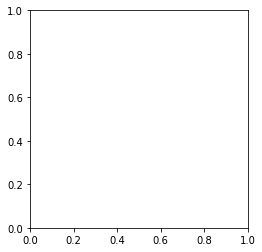

In [ ]:
plt.imshow(train_images[1], cmap='gray')

In [ ]:
# Normalization
train_images= (train_images-127.5)/127.5

TypeError: ignored

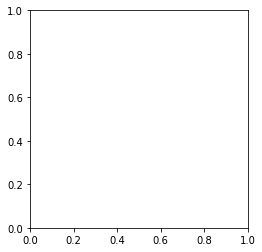

In [ ]:
plt.imshow(train_images[0],cmap='gray')

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# Expanding dimensions
train_images = train_images.reshape(train_images.shape[0],28,28,1)
train_images.shape

(60000, 28, 28, 1)

In [ ]:
# Defining parameters
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# Batchwise shuffling of the dataset
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Discriminator 

In [ ]:
def discriminator():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(7,(3,3),padding='same',input_shape=(28,28,1)))
  model.add(tf.keras.layers.Conv2D(7,(3,3),padding='same'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(50,activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  return model

In [ ]:
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# loss function for the discriminator 
def discriminator_loss(real_predictions, fake_predictions):
  real_predictions = tf.sigmoid(real_predictions)
  fake_predictions = tf.sigmoid(fake_predictions)
  real_loss = tf.keras.losses.binary_crossentropy(tf.ones_like(real_predictions), real_predictions)
  fake_loss = tf.keras.losses.binary_crossentropy(tf.zeros_like(fake_predictions),fake_predictions)
  if real_loss.shape == fake_loss.shape:
    return real_loss+fake_loss
  else:
    return fake_loss+0.1
  

## Generator 

In [ ]:
def generator():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(7*7*256,input_shape =(100,)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(7*7*256))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Reshape( (7,7,256) ))
  model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same'))
  return model

In [ ]:
def generator_loss(fake_predictions):
  fake_predictions = tf.sigmoid(fake_predictions)
  fake_loss = tf.keras.losses.binary_crossentropy(tf.ones_like(fake_predictions),fake_predictions)
  return fake_loss

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
generator_model= generator()
discriminator_model = discriminator()

## Training 

In [ ]:
def train(data, epochs):
  for i in range(epochs):
    for images in data:
      images = tf.cast(images,tf.dtypes.float32)
      train_step(images)

In [ ]:
def train_step(images):
  noise = np.random.randn(BATCH_SIZE, 100).astype('float32')
  # batchwise training 
  with tf.GradientTape() as generator_tape, tf.GradientTape() as discriminator_tape:
        # Create fake images 
        generated_images = generator_model(noise)
        # Pass fake images through the discriminator 
        generator_output = discriminator_model(generated_images)
        # Pass real images through the discriminator 
        real_output = discriminator_model(images)

        # calculate individual losses
        gen_loss = generator_loss(generator_output)
        disc_loss = discriminator_loss(real_output, generator_output)
        
        # Calculate gradients of loss functions
        generator_gradients= generator_tape.gradient(gen_loss,generator_model.trainable_variables)
        discriminator_gradients = discriminator_tape.gradient(disc_loss, discriminator_model.trainable_variables)
        
        # Optimise
        generator_optimizer.apply_gradients(zip(generator_gradients, generator_model.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator_model.trainable_variables))
        
        print("Generator Loss: ",np.mean(gen_loss))
        print("Discriminator Loss: ",np.mean(disc_loss))



In [ ]:
train(train_dataset,100)

Generator Loss:  14.099365
Discriminator Loss:  1.3177903
Generator Loss:  14.460887
Discriminator Loss:  0.95841414
Generator Loss:  14.34038
Discriminator Loss:  1.0782012
Generator Loss:  14.159618
Discriminator Loss:  1.2578908
Generator Loss:  13.85835
Discriminator Loss:  1.5573524
Generator Loss:  14.159618
Discriminator Loss:  1.2578803
Generator Loss:  14.400633
Discriminator Loss:  1.0183064
Generator Loss:  14.2198715
Discriminator Loss:  1.1979821
Generator Loss:  14.159618
Discriminator Loss:  1.2578955
Generator Loss:  14.701902
Discriminator Loss:  0.7188223
Generator Loss:  14.039111
Discriminator Loss:  1.3777461
Generator Loss:  14.099365
Discriminator Loss:  1.3178117
Generator Loss:  14.460887
Discriminator Loss:  0.95841265
Generator Loss:  14.400633
Discriminator Loss:  1.0183175
Generator Loss:  14.280127
Discriminator Loss:  1.1380867
Generator Loss:  14.280126
Discriminator Loss:  1.1380897
Generator Loss:  14.280126
Discriminator Loss:  1.1380901
Generator Los

KeyboardInterrupt: ignored

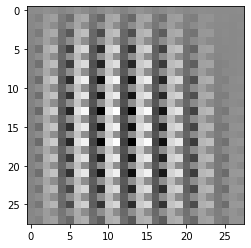

In [ ]:
test_image_noise = np.random.randn(1,100)
generated_test_image = generator_model(test_image_noise)
plt.imshow(tf.reshape(generated_test_image,(28,28)),cmap='gray')

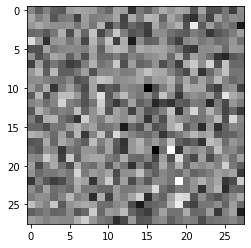

In [ ]:
random_image = np.random.randn(784)
random_image = tf.reshape(random_image,(28,28))
plt.imshow(random_image,cmap='gray')